<a href="https://colab.research.google.com/github/HanRyunKyeong/projectmanager/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###자전거 대여소 데이터

In [ ]:
import pandas as pd

In [5]:
data = pd.read_csv(
    '/content/sample_data/bicycle.csv',
    index_col='Date',  # Date 컬럼을 인덱스로 지정
    parse_dates=True)  # 자동으로 날짜 처리
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


#####컬럼 이름 변경

In [6]:
data.columns = ['Total', 'East', 'West']

In [7]:
data.head()

,Total,East,West
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


#####그래프로 시각화

<Axes: xlabel='Date'>

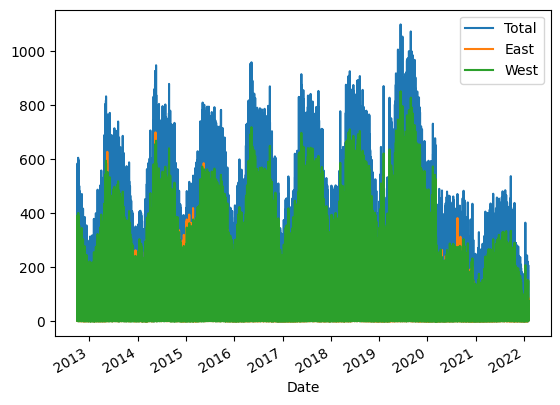

In [8]:
data.plot()

#####주 단위 합계 시각화

<Axes: xlabel='Date'>

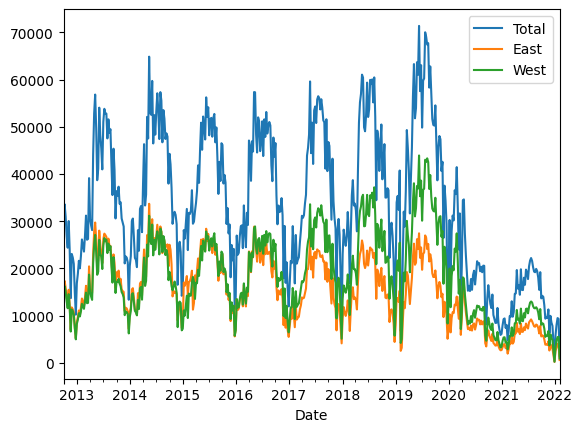

In [9]:
data.resample('W').sum().plot()   #W 주단위

<Axes: xlabel='Date'>

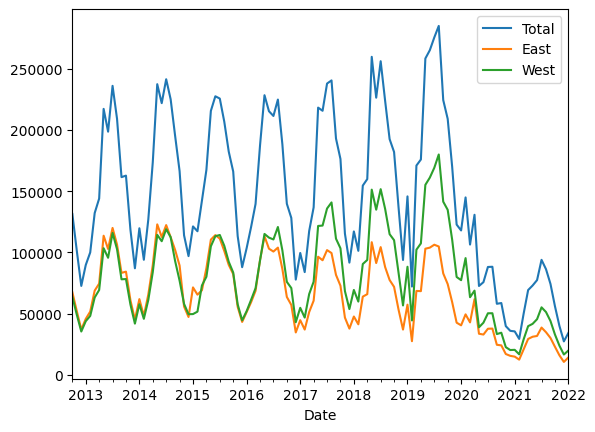

In [10]:
data.resample('M').sum().plot()   #M 월단위

#####시간대별 평균

In [13]:
data.index.hour   #시분초 중에 시

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='Date', length=148022)

In [14]:
data.index.time   #시분초 전체

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0), ...,
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

<Axes: xlabel='Date'>

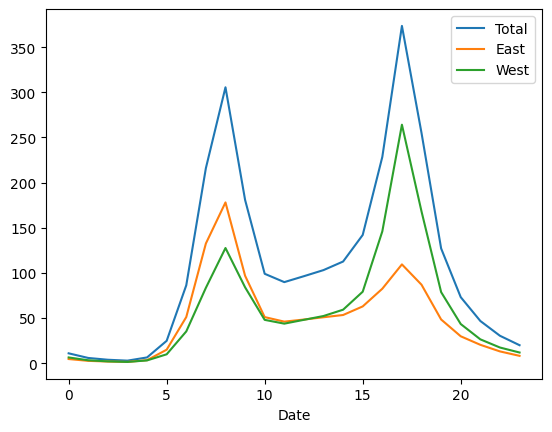

In [15]:
by_time = data.groupby(data.index.hour).mean()
by_time.plot()

#####요일별 평균

<Axes: xlabel='Date'>

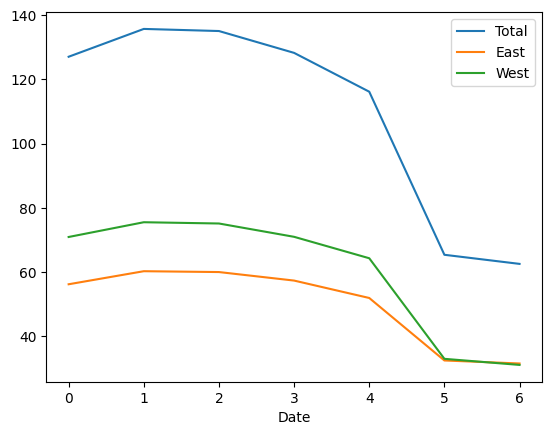

In [16]:
# 요일별 대여량(0: 월요일)
by_week = data.groupby(data.index.dayofweek).mean()
by_week.plot()

<Axes: xlabel='Date'>

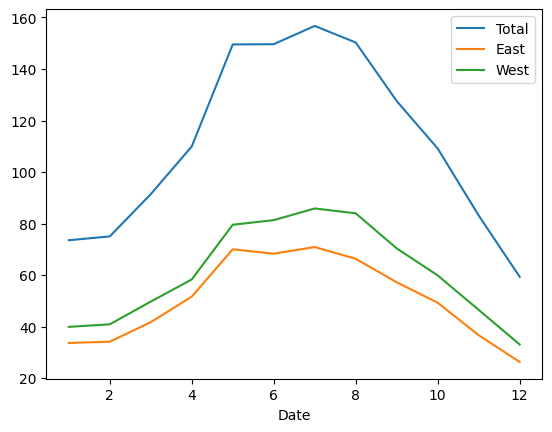

In [17]:
# 월별 대여량
by_month = data.groupby(data.index.month).mean()
by_month.plot()

#####주중과 주말의 비교

In [18]:
import numpy as np
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

In [19]:
by_time

Total        East        West
Weekday 00:00:00    9.076469    3.859995    5.216474
        01:00:00    4.505786    2.009076    2.496710
        02:00:00    2.997050    1.465396    1.531654
        03:00:00    2.580894    1.323576    1.257318
        04:00:00    7.426367    4.022237    3.404902
        05:00:00   31.766281   19.372589   12.393692
        06:00:00  114.026776   68.398003   45.628772
        07:00:00  289.448151  178.975494  110.472657
        08:00:00  403.890855  236.915135  166.975720
        09:00:00  220.241998  118.598184  101.643814
        10:00:00   97.989103   50.190465   47.798638
        11:00:00   76.341884   39.047900   37.293984
        12:00:00   80.039728   39.782974   40.256754
        13:00:00   86.405037   41.968913   44.436124
        14:00:00   98.195188   44.709487   53.485701
        15:00:00  140.200635   58.478665   81.721970
        16:00:00  266.174081   88.604630  177.569451
        17:00:00  478.786882  131.352247  347.434635
        18:00:00  323.010213  104.875170  218.135043
        19:00:00  154.853836   56.565819   98.288016
        20:00:00   85.892873   33.958466   51.934408
        21:00:00   53.668180   23.104176   30.564004
        22:00:00   33.841126   14.371993   19.469133
        23:00:00   21.134589    8.582615   12.551975
Weekend 00:00:00   15.477570    6.378762    9.098807
        01:00:00    8.915389    3.949461    4.965928
        02:00:00    5.781912    2.657699    3.124213
        03:00:00    3.341283    1.654174    1.687110
        04:00:00    3.687110    1.519591    2.167518
        05:00:00    7.233390    3.806928    3.426462
        06:00:00   16.809767    7.789324    9.020443
        07:00:00   32.328223   16.407155   15.921068
        08:00:00   59.680863   30.772288   28.908575
        09:00:00   82.423055   42.398637   40.024418
        10:00:00  101.570131   53.170926   48.399205
        11:00:00  123.415673   63.421352   59.994321
        12:00:00  137.116411   69.719478   67.396934
        13:00:00  144.893810   73.128336   71.765474
        14:00:00  148.639409   75.001704   73.637706
        15:00:00  146.609881   73.856332   72.753549
        16:00:00  134.170358   67.110165   67.060193
        17:00:00  110.392391   54.566156   55.826235
        18:00:00   84.624077   41.942078   42.681999
        19:00:00   57.609881   27.897785   29.712095
        20:00:00   41.144236   19.302101   21.842135
        21:00:00   29.346962   13.404884   15.942078
        22:00:00   21.625213    9.646792   11.978421
        23:00:00   16.834185    6.931289    9.902896

<Axes: xlabel='time'>

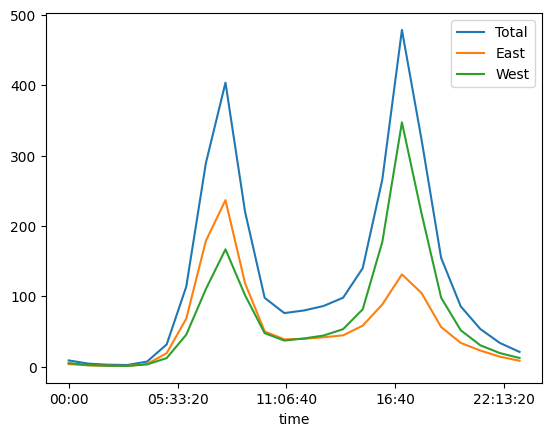

In [21]:
by_time.loc['Weekday'].plot()

<Axes: xlabel='time'>

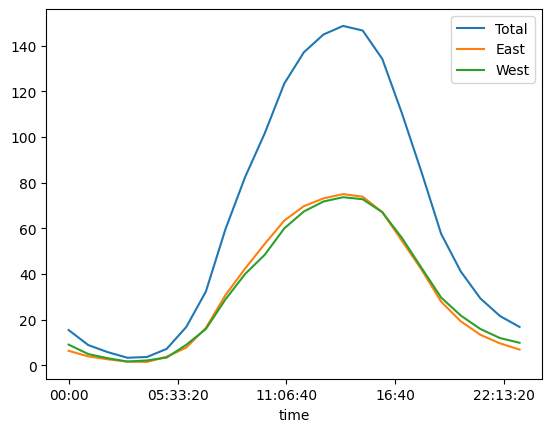

In [22]:
by_time.loc['Weekend'].plot()

<Axes: xlabel='time'>

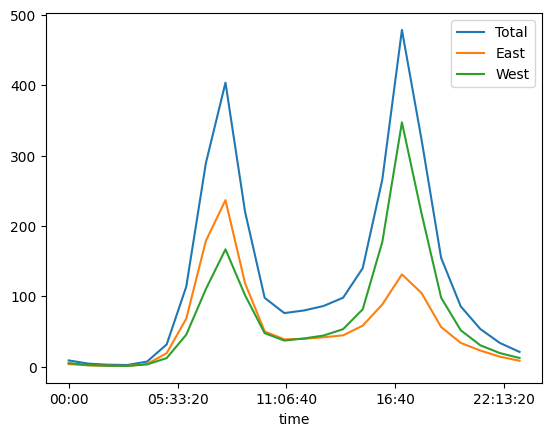

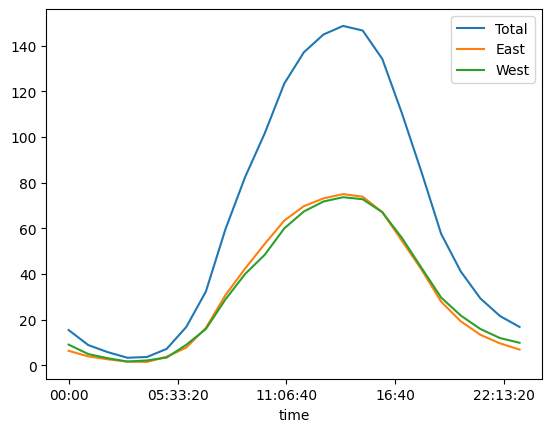

In [23]:
by_time.loc['Weekday'].plot()
by_time.loc['Weekend'].plot()

#텍스트 분석과 자연어 처리

### 문서 단어 행렬

In [25]:
df = pd.read_excel('/content/sample_data/yelp.xlsx')
df.head()

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


####데이터 형태

In [26]:
df.shape    #1000행(리뷰), 2열(review, sentiment)

(1000, 2)

####CountVectorizer 실습

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=500, stop_words='english')

In [28]:
dtm = cv.fit_transform(df['review'])

In [30]:
dtm.shape   #1000행에 500개 단어만

(1000, 500)

In [31]:
cv.get_feature_names_out()    #단어 목록 확인

array(['10', '100', '12', '20', '30', '35', '40', 'absolutely', 'ago',
       'amazing', 'ambiance', 'ambience', 'anytime', 'area', 'arrived',
       'ask', 'asked', 'ate', 'atmosphere', 'attentive', 'authentic',
       'average', 'avoid', 'away', 'awesome', 'awful', 'bacon', 'bad',
       'bar', 'barely', 'basically', 'bathroom', 'batter', 'bay', 'beans',
       'beat', 'beautiful', 'beef', 'beer', 'believe', 'belly', 'best',
       'better', 'big', 'biscuits', 'bisque', 'bit', 'bite', 'bites',
       'black', 'bland', 'boyfriend', 'bread', 'breakfast', 'bring',
       'brought', 'brunch', 'buffet', 'burger', 'burgers', 'business',
       'busy', 'butter', 'cafe', 'came', 'care', 'check', 'checked',
       'cheese', 'chef', 'chewy', 'chicken', 'chips', 'clean', 'close',
       'cold', 'come', 'coming', 'considering', 'cooked', 'cool',
       'couldn', 'couple', 'course', 'cream', 'customer', 'damn', 'day',
       'deal', 'decor', 'definitely', 'delicious', 'delish', 'deserves',
      

In [32]:
dtm.sum(axis=0)   #단어의 총 합계

matrix([[  5,   2,   2,   4,   5,   3,   4,   8,   3,  24,   7,   3,   5,
           7,   3,   4,   5,   3,  11,   7,   6,   4,   5,   5,  12,   3,
           5,  18,   7,   5,   2,   3,   2,   4,   3,   4,   3,   5,   8,
           3,   2,  30,  16,   3,   2,   2,   8,   2,   2,   2,  11,   3,
           5,  10,   5,   3,   3,  11,  12,   4,   4,   3,   3,   3,  20,
           3,   7,   3,   3,   4,   3,  17,   7,   9,   4,   9,  11,  10,
           4,   7,   3,   3,   3,   3,   4,   6,   4,   9,   7,   3,  19,
          23,   3,   3,   5,   3,  22,  13,   3,   8,   6,   4,  19,   5,
           4,   8,   9,   3,  26,   3,   3,   4,   4,   4,   4,   3,  19,
           5,   8,   3,   3,   6,   5,   3,   3,   4,  10,   5,   3,  20,
           5,   4,   7,  12,   7,   5,   3,  11,   2,   2,   2,   8,   2,
           2,   2,   3,   2,   5,   3,  13,   3,   2,   2,   2,   2,   4,
         126,  14,   5,   5,  27,   4,   9,   3,   2,   4,   2,   4,   3,
           8,   2,   2,  18,   2,   3,

####단어 빈도 데이터 프레임

In [34]:
word_count = pd.DataFrame({
'단어': cv.get_feature_names_out(), '빈도': dtm.sum(axis=0).flat
})

word_count

,단어,빈도
0,10,5
1,100,2
2,12,2
3,20,4
4,30,5
...,...,...
495,wrong,5
496,year,2
497,years,3
498,yummy,4


In [36]:
#식당 리뷰에 많이 나오는 상위 단어 20개
word_count.sort_values('빈도', ascending=False).head(20)

,단어,빈도
156,food,126
316,place,106
175,good,95
389,service,85
178,great,70
231,like,46
442,time,42
343,really,36
220,just,35
41,best,30


In [37]:
#코랩에서 엑셀 파일로 저장 / 내 컴퓨터에 다운로드 가능
word_count.to_excel('word_count.xlsx')

###단어 구름

In [58]:
!pip install wordcloud

#####그리기 / 보기 및 저장

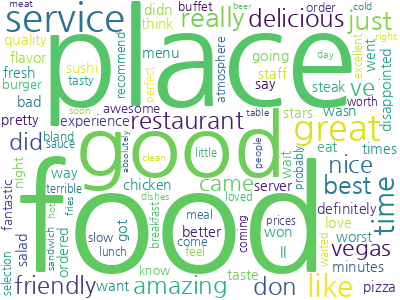

In [66]:
from wordcloud import WordCloud

wc = WordCloud(
    font_path='NanumGothic.ttf', # 원하는 글꼴은 눈누 등의 사이트에서 다운받아 쓰세요
    background_color='white',
    max_words=100,
    width=400,
    height=300
)

count_dic = dict(zip(word_count.단어, word_count.빈도))
cloud = wc.fit_words(count_dic)
cloud.to_image()

#####특정한 모양, 색으로 그리기

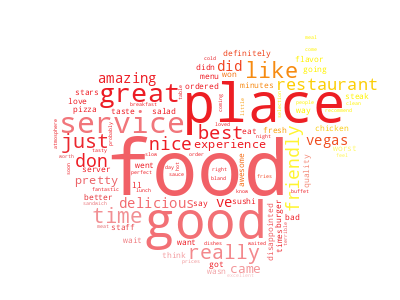

In [67]:
from PIL import Image
import numpy as np

# 그림을 불러온다 / 코랩 파일리스트에 원하는 모양의 이미지 업로드
mask = np.asarray(Image.open('mask.png'))

# 그림대로 모양을 잡아준다
wc = WordCloud(background_color='white', mask=mask)
wc.fit_words(count_dic)

# 색칠을 해준다
from wordcloud import ImageColorGenerator
color_func = ImageColorGenerator(mask)
cloud = wc.recolor(color_func=color_func)
cloud.to_image()

#토큰화

###Python에서 한국어 토큰화

In [68]:
!pip install kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 48.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.16.0-py3-none-any.whl size=30813255 sha256=3b0fdd6274f92d299d2f3c7266525e62f90926f4d519f17e4255762f2c3f1fcf
  Stored in directory: /root/.cache/pip/wheels/6b/03/2b/ac2c97cc65ebd9df3516f4b900adc2f0a744df8d1375b2e2ef
Successfully built kiwipiepy-model


In [69]:
from kiwipiepy import Kiwi
kiwi = Kiwi()

####kiwi 형태소 분석

In [70]:
text = '오늘은 자연어 처리를 배우기 좋은 날이다.'
result = kiwi.tokenize(text)
result

[Token(form='오늘', tag='NNG', start=0, len=2),
 Token(form='은', tag='JX', start=2, len=1),
 Token(form='자연어', tag='NNP', start=4, len=3),
 Token(form='처리', tag='NNG', start=8, len=2),
 Token(form='를', tag='JKO', start=10, len=1),
 Token(form='배우', tag='VV', start=12, len=2),
 Token(form='기', tag='ETN', start=14, len=1),
 Token(form='좋', tag='VA', start=16, len=1),
 Token(form='은', tag='ETM', start=17, len=1),
 Token(form='날', tag='NNG', start=19, len=1),
 Token(form='이', tag='VCP', start=20, len=1),
 Token(form='다', tag='EF', start=21, len=1),
 Token(form='.', tag='SF', start=22, len=1)]

####kiwi 명사 추출 함수

In [72]:
def extract_nouns(text):
    result = kiwi.tokenize(text)
    for token in result:
        if token.tag in ['NNG', 'NNP']:
            yield token.form

In [73]:
list(extract_nouns('어제는 홍차를 마시고, 오늘은 커피를 마셨다.'))

['어제', '홍차', '오늘', '커피']

####한국어 문서 단어 행렬 만들기

In [79]:
import pandas as pd
df = pd.read_csv('/content/sample_data/news_ai.csv')

In [81]:
kiwi.tokenize('인공지능')

[Token(form='인공', tag='NNG', start=0, len=2),
 Token(form='지능', tag='NNG', start=2, len=2)]

In [82]:
df = pd.read_csv('/content/sample_data/news_ai.csv')

kiwi = Kiwi()
kiwi.add_user_word('인공지능', 'NNG')

cv = CountVectorizer(max_features=100, tokenizer=extract_nouns)
dtm = cv.fit_transform(df['본문'])
word_count = pd.DataFrame({
	'단어': cv.get_feature_names_out(),
	'빈도': dtm.sum(axis=0).flat
})
word_count.sort_values('빈도', ascending=False).head(20)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,단어,빈도
18,기술,279
70,인공지능,247
12,교육,146
2,개발,144
80,제공,116
76,전형,109
45,서비스,107
22,대표,106
84,지원,103
41,산업,101


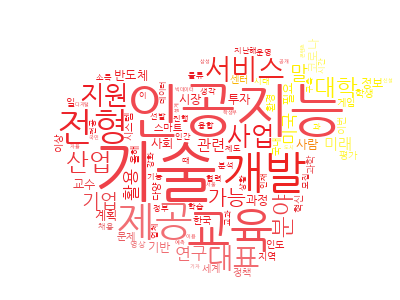

In [83]:
count_dic = dict(zip(word_count.단어, word_count.빈도))
mask = np.asarray(Image.open('mask.png'))

# 그림대로 모양을 잡아준다
wc = WordCloud(background_color='white', font_path='NanumGothic.ttf', mask=mask)
wc.fit_words(count_dic)

# 색칠을 해준다
from wordcloud import ImageColorGenerator
color_func = ImageColorGenerator(mask)
cloud = wc.recolor(color_func=color_func)
cloud.to_image()